# London Airbnb Exploratory Data Analysis

In [13]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("airbnb.csv")

# Look at data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [14]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

In [17]:
# Convert 'last_review' into Timestamp
df['last_review'] = pd.to_datetime(df.last_review, format = '%Y-%m-%d')

# Q: What is the rough time window of our data?
df.last_review.describe()

# A: July 2011 - September 2022

count                            52571
mean     2021-02-03 00:46:30.648836608
min                2011-07-02 00:00:00
25%                2019-09-16 00:00:00
50%                2022-06-07 00:00:00
75%                2022-08-20 00:00:00
max                2022-09-11 00:00:00
Name: last_review, dtype: object

# Consistency: id, host_id, and host_name

I will run some quick checks to verify the consistency of labels etc in the data set. For example: id, host_id, and host_name.

In [18]:
# Are id numbers unique?
len(df.id.unique()) == len(df)

True

There are no hosts with the same id.

In [19]:
# Checking calculated_host_listings_count
listings_by_host_id = df.groupby(['host_id', 'calculated_host_listings_count']).id.count().reset_index()
listings_by_host_id.rename(columns = {'id' : 'recalculated_listings_count'}, inplace = True)

# Return data frame with host_ids for which calculated_host_listings_count doesn't match my calculation
listings_by_host_id[listings_by_host_id.calculated_host_listings_count != listings_by_host_id.recalculated_listings_count]


,host_id,calculated_host_listings_count,recalculated_listings_count


The data frame is empty so 'calculated_host_listings_count' is correct.

In [21]:
# Do same host ids have same host names?
host_names_by_host_id = df.groupby('host_id').host_name.nunique().reset_index()
host_ids_without_names = host_names_by_host_id[host_names_by_host_id.host_name != 1]

# Suggests some host ids don't have names. Check against original data set
host_ids_without_names = df[df.host_id.isin(host_ids_without_names['host_id'])]
print(f"{len(host_ids_without_names)} host ids do not have host names, but no host id has more than one name attached.")

5 host ids do not have host names, but no host id has more than one name attached.


In [3]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000,660.000000,NaN


In [4]:
# make a copy
df_cleaned = df.copy()

#  porcentage of missing values 
df_cleaned.isnull().mean() * 100

id                                  0.000000
name                                0.030281
host_id                             0.000000
host_name                           0.007210
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        24.195758
reviews_per_month                  24.195758
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

In [5]:
# dropped the non-relevant columns
df_cleaned = df_cleaned.drop(columns=['id', 'neighbourhood_group', 'license'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            69330 non-null  object 
 1   host_id                         69351 non-null  int64  
 2   host_name                       69346 non-null  object 
 3   neighbourhood                   69351 non-null  object 
 4   latitude                        69351 non-null  float64
 5   longitude                       69351 non-null  float64
 6   room_type                       69351 non-null  object 
 7   price                           69351 non-null  int64  
 8   minimum_nights                  69351 non-null  int64  
 9   number_of_reviews               69351 non-null  int64  
 10  last_review                     52571 non-null  object 
 11  reviews_per_month               52571 non-null  float64
 12  calculated_host_listings_count  

In [6]:
# I do not think there are outliers but in case there were, use this function

# def remove_outliers(df):
#     """
#     Remove outliers using IQR method.
    
#     Arg:
#     Input DataFrame

#     Return:
#     DataFrame without outliers
    
#     """

#     num_cols = df.select_dtypes(include=['float64', 'int64']).columns

#     for col in num_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#     return df

# df_cleaned = remove_outliers(df_cleaned)

In [7]:
# removed some rows
df_cleaned = df_cleaned.iloc[:10000]

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            9985 non-null   object 
 1   host_id                         10000 non-null  int64  
 2   host_name                       9995 non-null   object 
 3   neighbourhood                   10000 non-null  object 
 4   latitude                        10000 non-null  float64
 5   longitude                       10000 non-null  float64
 6   room_type                       10000 non-null  object 
 7   price                           10000 non-null  int64  
 8   minimum_nights                  10000 non-null  int64  
 9   number_of_reviews               10000 non-null  int64  
 10  last_review                     7808 non-null   object 
 11  reviews_per_month               7808 non-null   float64
 12  calculated_host_listings_count  1

In [9]:
df_cleaned.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,7808.000000,10000.000000,10000.000000,10000.000000
mean,1.977423e+07,51.511488,-0.126860,121.392500,6.689500,37.937300,0.548535,3.711100,75.855500,3.966400
std,2.001607e+07,0.046025,0.086402,241.283248,32.033924,69.018845,0.786794,19.960683,120.509274,9.652305
min,6.774000e+03,51.296850,-0.486540,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,4.729563e+06,51.481877,-0.187810,48.000000,1.000000,1.000000,0.060000,1.000000,0.000000,0.000000
50%,1.543236e+07,51.516880,-0.117460,80.000000,2.000000,9.000000,0.240000,1.000000,0.000000,0.000000
75%,3.199665e+07,51.543152,-0.068940,130.000000,4.000000,45.000000,0.720000,2.000000,133.000000,3.000000
max,4.332772e+08,51.668530,0.242730,8000.000000,1124.000000,929.000000,8.530000,285.000000,365.000000,121.000000


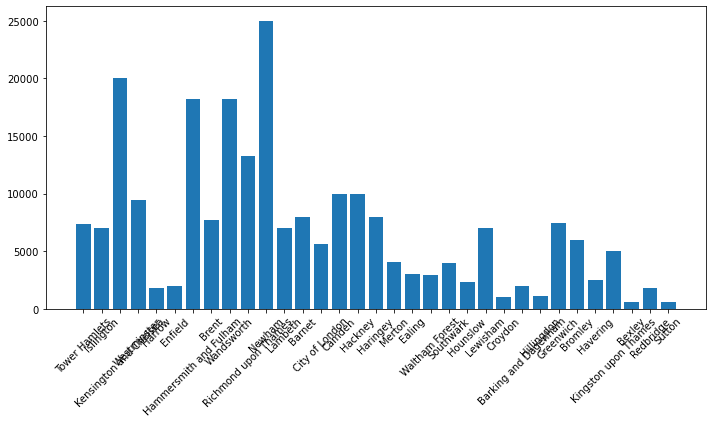

In [12]:

# bar chart
plt.figure(figsize=(10,6))
plt.bar(df['neighbourhood'], df['price'])

plt.xticks(rotation=45)

plt.tight_layout() 

plt.show()